In [3]:
import os
from os import listdir, walk
from os.path import isfile, join
import cv2
import numpy as np

work_Directory = os.getcwd()


# Obtaining the name of the images in the dataset folder

In [4]:
os.chdir(work_Directory)
print(os.getcwd())

try:
    os.chdir(f'{work_Directory}/dataset/dataverse_files-2/ZT76_39_A')
except Exception as e:
    print('Encounter an error: ', e)

f = []
for (dirpath, dirnames, filenames) in walk(os.getcwd()):
    f.extend(filenames)
    break
print(f'The list of files in the dataset folder is {f}')
print(f'The number of images in the folder "ZT76_39_A" is {len(f)}')



/Users/mustafamohammadi/Documents/GitHub/3DVNN_202400801/20250109-BioImages_VoronoiDiagramSimplified_FN
Encounter an error:  [Errno 2] No such file or directory: '/Users/mustafamohammadi/Documents/GitHub/3DVNN_202400801/20250109-BioImages_VoronoiDiagramSimplified_FN/dataset/dataverse_files-2/ZT76_39_A'
The list of files in the dataset folder is ['2- multi_processing_Biomedical_Images_folder.py', 'Original_snic.h', '_snic.o', '1- Main_Vor_Tess_v8_001_FN_20250111.py', '.DS_Store', '20250109-BioImages_Voronoi Diagram Simplified_FN.code-workspace', '4- onehot_multiclass_labeling_graphs.py', '_______scratch.ipynb', '3- multi_processing_labelFinding.py', 'snic.c', 'compile_snic_lib.py', 'Original_snic.c', '_snic.c', 'utils.py', '_snic.cpython-311-darwin.so', 'snic.h', 'snic.o']
The number of images in the folder "ZT76_39_A" is 17


In [5]:
print(dirpath)
print(dirnames)
print(filenames)

/Users/mustafamohammadi/Documents/GitHub/3DVNN_202400801/20250109-BioImages_VoronoiDiagramSimplified_FN
['Figs', 'dataset', '20250311 - Original files before std and cov ', '__pycache__', 'Env_Config', '.virtual_documents', '.ipynb_checkpoints', 'ImageGraphs', 'plots']
['2- multi_processing_Biomedical_Images_folder.py', 'Original_snic.h', '_snic.o', '1- Main_Vor_Tess_v8_001_FN_20250111.py', '.DS_Store', '20250109-BioImages_Voronoi Diagram Simplified_FN.code-workspace', '4- onehot_multiclass_labeling_graphs.py', '_______scratch.ipynb', '3- multi_processing_labelFinding.py', 'snic.c', 'compile_snic_lib.py', 'Original_snic.c', '_snic.c', 'utils.py', '_snic.cpython-311-darwin.so', 'snic.h', 'snic.o']


# Another way to read the images and store them into a list with their name

In [1]:
import os, cv2

def load_images_from_folder(folder_path):
    """
    Loads images from a given folder, returning a list of tuples (filename, image).
    """
    images = []
    
    # Iterate through the folder
    for filename in os.listdir(folder_path):
        # Build the full path to the current file
        file_path = os.path.join(folder_path, filename)
        
        # Check if it's an image file (you can extend checks for more formats)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            # Read the image using OpenCV
            img = cv2.imread(file_path)
            if img is not None:
                images.append((filename, img))
            else:
                print(f"Warning: Could not read {file_path}")
    
    return images

# ----------------- Load the dataset -----------------
image_folder_path = 'dataset/dataverse_files-2/ZT76_39_A'
images_with_names = load_images_from_folder(image_folder_path)

# Each element in images_with_names is a tuple: (filename, image)
for img_tuple in images_with_names:
    print(f"Filename: {img_tuple[0]}, Image shape: {img_tuple[1].shape}")

Filename: ZT76_39_A_6_12.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_6_13.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_7_8.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_5_8.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_6_11.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_6_10.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_5_9.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_4_11.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_1_9.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_8_11.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_1_8.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_4_10.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_3_8.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_4_12.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_8_12.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_8_13.jpg, Image shape: (3100, 3100, 3)
Filename: ZT76_39_A_4_13.jpg, Image shape: (3100, 3100, 3)
Fil

# Reading the converted dataset to see what is the distribution of the labels

In [6]:
import torch

dataset  = torch.load('dataset/ConvertedDataset/20250326_GraphDatasetWithJabels.pt')
for i in range(10):
    print(dataset[i]['y'])

/var/folders/bn/yz9nrf9s393b2bxltkfvj6j80000gn/T/ipykernel_8359/3346175808.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset  = torch.load('dataset/ConvertedDatase

tensor([1., 0., 0., 1., 0.])
tensor([1., 0., 0., 1., 1.])
tensor([1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 1.])
tensor([1., 0., 1., 0., 0.])
tensor([1., 0., 1., 0., 1.])
tensor([1., 0., 1., 0., 0.])
tensor([1., 0., 0., 1., 0.])
tensor([1., 0., 0., 1., 0.])
tensor([1., 0., 1., 0., 0.])


[[1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1.]
 [1. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]]
[(1.0, 0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 0.0, 1.0, 1.0), (1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 1.0, 0.0, 0.0), (1.0, 0.0, 1.0, 0.0, 1.0), (1.0, 0.0, 1.0, 0.0, 0.0), (1.0, 0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 1.0, 0.0, 0.0), (1.0, 0.0, 0.0, 1.0, 0.0), (1.0, 1.0, 0.0, 0.0, 0.0), (1.0, 0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 1.0, 0.0, 0.0), (1.0, 0.0, 0.0, 1.0, 1.0), (1.0, 0.0, 0.0, 1.0, 0.0), (1.0, 1.0, 0.0, 0.0, 0.0), (1.0, 0.0, 1.0, 1.0, 1.0), (1.0, 0.0, 0.0, 1.0, 1.0), (1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 1.0, 0.0, 0.0), (1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 1.0, 0.0, 0.0), (1.0, 0.0, 1.0, 0.0, 0.0), (1.0, 0.0, 0.0, 1.0, 1.0), (1.0, 0.0, 0.0, 0.0, 

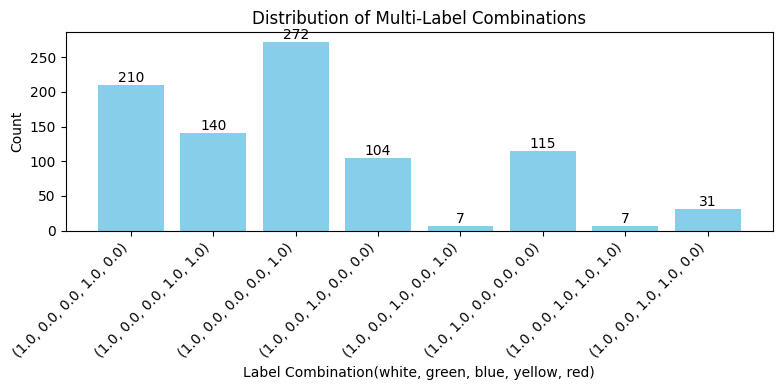

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


labels = [label['y'] for label in dataset]
labels = np.array(labels)
print(labels)

# 1. Convert each multi-hot vector to a tuple (immutable) so it can be hashed easily
tuple_labels = [tuple(label) for label in labels]
print(tuple_labels)

# 2. Count occurrences of each unique label combination
counts = Counter(tuple_labels)

# 3. Prepare data for plotting
# We'll convert the keys (tuples) to strings for a nicer x-axis
label_combinations = [str(k) for k in counts.keys()]
occurrences = [counts[k] for k in counts.keys()]

# 4. Plot the distribution
plt.figure(figsize=(8, 4))
bars = plt.bar(label_combinations, occurrences, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Label Combination(white, green, blue, yellow, red)')
plt.ylabel('Count')
plt.title('Distribution of Multi-Label Combinations')
plt.tight_layout()

# 5. Add the count values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        str(height),
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.show()


In [8]:
dataset[0]

Data(x=[1024, 7], pos=[1024, 2], edge_index=[2, 6229], y=[5])

## Comapre the dataset labels for each label.
## per-label frequency distribution


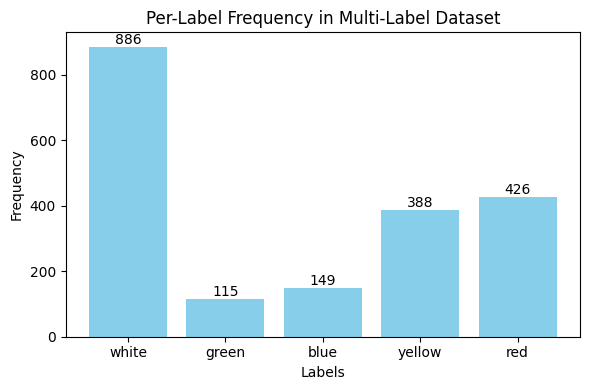

white: 886.0
green: 115.0
blue: 149.0
yellow: 388.0
red: 426.0


In [9]:
# Example label names
label_names = ["white", "green", "blue", "yellow", "red"]


# Convert to NumPy array for easy summation
arr = np.array(labels)

# Summation across rows gives the count of how many samples have each label
per_label_counts = arr.sum(axis=0)

# Plot the per-label frequencies
plt.figure(figsize=(6,4))

plt.bar(label_names, per_label_counts, color='skyblue')
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.title("Per-Label Frequency in Multi-Label Dataset")

# (Optional) Annotate counts on top of bars
for i, count in enumerate(per_label_counts):
    plt.text(i, count+0.1, str(int(count)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print out raw counts if you want them in code
for label, count in zip(label_names, per_label_counts):
    print(f"{label}: {count}")